In [ ]:
!wget "https://he-public-data.s3.ap-southeast-1.amazonaws.com/shell_dataset.zip"

--2021-10-13 03:06:20--  https://he-public-data.s3.ap-southeast-1.amazonaws.com/shell_dataset.zip
Resolving he-public-data.s3.ap-southeast-1.amazonaws.com (he-public-data.s3.ap-southeast-1.amazonaws.com)... 52.219.40.231
Connecting to he-public-data.s3.ap-southeast-1.amazonaws.com (he-public-data.s3.ap-southeast-1.amazonaws.com)|52.219.40.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3467218047 (3.2G) [binary/octet-stream]
Saving to: ‘shell_dataset.zip’

shell_dataset.zip   100%[===================>]   3.23G  14.5MB/s    in 3m 51s  

2021-10-13 03:10:12 (14.3 MB/s) - ‘shell_dataset.zip’ saved [3467218047/3467218047]



# GET DATA

In [ ]:
!unzip -q "shell_dataset.zip"

In [ ]:
!unzip -q "dataset/train.zip"
!unzip -q "dataset/test.zip"

In [ ]:
import pandas as pd
test_data = pd.read_csv("dataset/test.csv")
train_data = pd.read_csv("train/train.csv")
sample = pd.read_csv("dataset/sample_submission.csv")

# CLOUD COVER %

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### sample 1

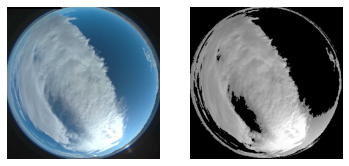

In [ ]:
img = cv2.resize(cv2.imread('/content/train/0101/0101142000.jpg'),(300,300))
white = np.array([255, 255, 255])
lowerBound = np.array([50,95,95])
mask = cv2.inRange(img, lowerBound, white)
masked = cv2.bitwise_and(img, img, mask=mask)
masked = cv2.cvtColor(masked,cv2.COLOR_BGR2GRAY)

RGB_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(RGB_image)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(masked,cmap='gray')

Error around 10% on most sky images having sun.

### sample 2

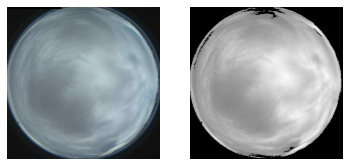

In [ ]:
img = cv2.resize(cv2.imread('/content/train/0101/0101110000.jpg'),(300,300))
white = np.array([255, 255, 255])
lowerBound = np.array([50,95,95])
mask = cv2.inRange(img, lowerBound, white)
masked = cv2.bitwise_and(img, img, mask=mask)
masked = cv2.cvtColor(masked,cv2.COLOR_BGR2GRAY)

RGB_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(RGB_image)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(masked,cmap='gray')

Error around 5% for 100% covered sky

## sample 3

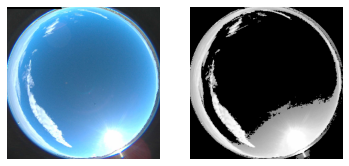

In [ ]:
img = cv2.resize(cv2.imread('/content/train/0101/0101135000.jpg'),(300,300))
white = np.array([255, 255, 255])
lowerBound = np.array([50,95,95])
mask = cv2.inRange(img, lowerBound, white)
masked = cv2.bitwise_and(img, img, mask=mask)
masked = cv2.cvtColor(masked,cv2.COLOR_BGR2GRAY)

RGB_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #only needed to display in plt
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(RGB_image)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(masked,cmap='gray')

Error around 30% for clear sky case

## Function to get Percentage

In [ ]:
def get_cloud_cov(img_path):
  img = cv2.resize(cv2.imread(img_path),(300,300))
  white = np.array([255, 255, 255])
  lowerBound = np.array([50,95,95])
  mask = cv2.inRange(img, lowerBound, white)
  masked = cv2.bitwise_and(img, img, mask=mask)
  masked = cv2.cvtColor(masked,cv2.COLOR_BGR2GRAY)
  percent = int(100*(np.count_nonzero(masked)/(np.pi*150**2)))
  if percent > 100:
    return 100
  else:
    return percent

# Train images cloud percentage calculation

In [ ]:
train_data.head(5)

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,1/1,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,-1,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,1/1,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,-1,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,1/1,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,-1,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,1/1,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,-1,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,1/1,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,-1,7.20,285.5,806.762,0.0,0.182,0.0,0.0


In [ ]:
train_data['time_MST'] = pd.to_datetime(train_data['MST'], format='%H:%M')

In [ ]:
train_data = train_data.set_index('time_MST').between_time('07:40:00', '16:40:00').reset_index().reindex(columns=train_data.columns)

In [ ]:
train_data.drop('time_MST',axis=1,inplace=True)

In [ ]:
train_data.head(5)

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,1/1,07:40,8.53993,1.078100,122.69154,7.202,1.503,-5.597,37.54,-1,2.20,195.9,802.352,0.0,0.070,0.0,0.1883
1,1/1,07:41,9.07025,0.712142,122.85536,6.996,1.345,-5.755,37.56,-1,4.45,262.0,802.215,0.0,0.179,0.0,0.1862
2,1/1,07:42,9.57332,0.583561,123.01949,6.975,1.437,-5.563,38.24,-1,4.70,247.0,802.197,0.0,0.351,0.0,0.1598
3,1/1,07:43,10.04140,0.568726,123.18393,7.081,1.437,-5.663,37.64,-1,3.45,190.8,802.220,0.0,0.103,0.0,0.1774
4,1/1,07:44,10.59230,0.395635,123.34870,7.151,1.547,-5.453,38.14,-1,4.45,172.2,802.117,0.0,0.386,0.0,0.1634


In [ ]:
len(train_data)

198006

In [ ]:
for i, row in enumerate(train_data.index): 
  #prepare path
  date = datetime.strptime(train_data.loc[row,'DATE (MM/DD)']+'/2020','%m/%d/%Y').date()
  time = datetime.strptime(train_data.loc[row,'MST'],'%H:%M').time()
  train_data.loc[row,'date_time'] = datetime.combine(date,time)

In [ ]:
train_data = train_data.set_index('date_time')

In [ ]:
train_data = train_data.resample('10min').mean()

In [ ]:
train_data.dropna(inplace = True)

In [ ]:
train_data.head(5)

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
date_time,,,,,,,,,,,,,,,
2020-01-01 07:40:00,12.17524,0.384260,123.432519,7.0196,1.4290,-5.6010,38.004,1.7,2.725,218.25,802.1293,0.0,0.1517,0.0,0.18285
2020-01-01 07:50:00,24.76317,0.354592,125.099799,7.6148,1.8802,-5.1888,37.825,19.9,4.575,263.97,801.9527,0.0,0.3109,0.0,0.19227
2020-01-01 08:00:00,39.45137,0.806115,126.801204,8.8040,2.5528,-4.9862,35.472,37.4,5.775,268.42,802.3032,0.0,0.2422,0.0,0.21520
2020-01-01 08:10:00,36.77850,3.015754,128.538754,9.3120,2.8692,-4.7888,34.860,26.0,9.175,267.33,802.0695,0.0,0.2413,0.0,0.20680
2020-01-01 08:20:00,33.79576,1.603335,130.314377,9.2720,2.8816,-4.6874,35.267,15.6,6.350,289.01,802.5851,0.0,0.1743,0.0,0.19448


In [ ]:
train_data['Total Cloud Cover [%]'] = np.NaN

In [ ]:
for i, row in enumerate(train_data.index): 
  #prepare path
  date = row.date()
  time = row.time()
  date = date.strftime('%m%d')
  time = time.strftime('%H%M%S')
  path = 'train/'+date+'/'+date+time+'.jpg'
  try:
    train_data.iloc[i,7] = get_cloud_cov(path)
  except:
    continue

In [ ]:
train_data['Total Cloud Cover [%]'].fillna(np.mean(train_data['Total Cloud Cover [%]']),inplace=True)

In [ ]:
train_data.head(5)

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
date_time,,,,,,,,,,,,,,,
2020-01-01 07:40:00,12.17524,0.384260,123.432519,7.0196,1.4290,-5.6010,38.004,51,2.725,218.25,802.1293,0.0,0.1517,0.0,0.18285
2020-01-01 07:50:00,24.76317,0.354592,125.099799,7.6148,1.8802,-5.1888,37.825,54,4.575,263.97,801.9527,0.0,0.3109,0.0,0.19227
2020-01-01 08:00:00,39.45137,0.806115,126.801204,8.8040,2.5528,-4.9862,35.472,63,5.775,268.42,802.3032,0.0,0.2422,0.0,0.21520
2020-01-01 08:10:00,36.77850,3.015754,128.538754,9.3120,2.8692,-4.7888,34.860,53,9.175,267.33,802.0695,0.0,0.2413,0.0,0.20680
2020-01-01 08:20:00,33.79576,1.603335,130.314377,9.2720,2.8816,-4.6874,35.267,36,6.350,289.01,802.5851,0.0,0.1743,0.0,0.19448


In [ ]:
train_data.describe()['Total Cloud Cover [%]']

count    20130.000000
mean        62.182373
std         19.884047
min          0.000000
25%         44.000000
50%         62.000000
75%         79.000000
max        100.000000
Name: Total Cloud Cover [%], dtype: float64

In [ ]:
train_data['Total Cloud Cover [%]'] = train_data['Total Cloud Cover [%]'].astype(np.int64)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20130 entries, 2020-01-01 07:40:00 to 2020-12-31 16:40:00
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Global CMP22 (vent/cor) [W/m^2]        20130 non-null  float64
 1   Direct sNIP [W/m^2]                    20130 non-null  float64
 2   Azimuth Angle [degrees]                20130 non-null  float64
 3   Tower Dry Bulb Temp [deg C]            20130 non-null  float64
 4   Tower Wet Bulb Temp [deg C]            20130 non-null  float64
 5   Tower Dew Point Temp [deg C]           20130 non-null  float64
 6   Tower RH [%]                           20130 non-null  float64
 7   Total Cloud Cover [%]                  20130 non-null  int64  
 8   Peak Wind Speed @ 6ft [m/s]            20130 non-null  float64
 9   Avg Wind Direction @ 6ft [deg from N]  20130 non-null  float64
 10  Station Pressure [mBar]            

In [ ]:
train_data.to_csv('train_filled.csv')

# Explore

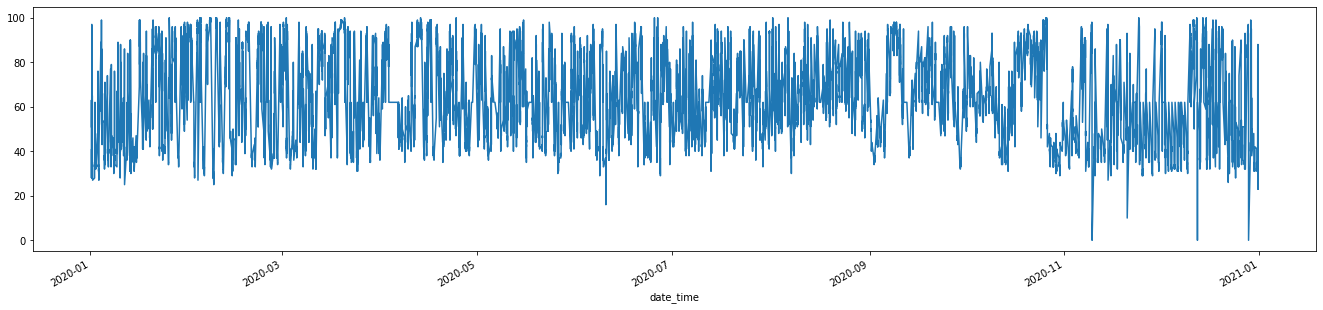

In [ ]:
plt.figure(figsize=(23,5))
train_data['Total Cloud Cover [%]'].plot()

([<matplotlib.axis.XTick at 0x7f17fc9da590>,
 <a list of 11 Text major ticklabel objects>)

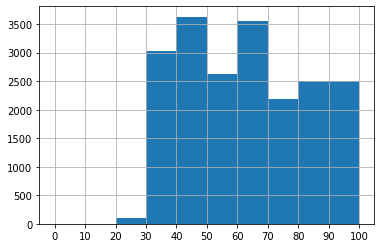

In [ ]:
train_data['Total Cloud Cover [%]'].hist(bins=10,range=[0,100])
plt.xticks(np.arange(0,101,10))

In [ ]:
train_data.corr()['Total Cloud Cover [%]']

Global CMP22 (vent/cor) [W/m^2]         -0.375210
Direct sNIP [W/m^2]                     -0.767482
Azimuth Angle [degrees]                  0.077921
Tower Dry Bulb Temp [deg C]             -0.145987
Tower Wet Bulb Temp [deg C]             -0.066518
Tower Dew Point Temp [deg C]             0.183788
Tower RH [%]                             0.430218
Total Cloud Cover [%]                    1.000000
Peak Wind Speed @ 6ft [m/s]             -0.075377
Avg Wind Direction @ 6ft [deg from N]   -0.168148
Station Pressure [mBar]                 -0.092425
Precipitation (Accumulated) [mm]         0.048423
Snow Depth [cm]                         -0.025809
Moisture                                 0.334324
Albedo (CMP11)                           0.105505
Name: Total Cloud Cover [%], dtype: float64

# Split Data

# Model building

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


In [ ]:
model=ARIMA(endog=train_data['Total Cloud Cover [%]'],exog=train_data,order=(1,0,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
history = model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
print(history.summary())

                                ARMA Model Results                               
Dep. Variable:     Total Cloud Cover [%]   No. Observations:                20130
Model:                        ARMA(1, 1)   Log Likelihood              603866.768
Method:                          css-mle   S.D. of innovations              0.000
Date:                   Wed, 13 Oct 2021   AIC                       -1207695.536
Time:                           04:12:45   BIC                       -1207545.246
Sample:                                0   HQIC                      -1207646.381
                                                                                 
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  8.407e-13   4.82e-09      0.000      1.000   -9.44e-09    9.44e-09
Global CMP22 (vent/cor) [W

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


# Directly using test weather data

In [ ]:
test_data.head(5)

,scenario_set,30_min_horizon,60_min_horizon,90_min_horizon,120_min_horizon
0,1,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN


In [ ]:
path = '/content/test/2/weather_data.csv'
wd = pd.read_csv(path)

In [ ]:
todays_date = datetime.now().date()
index = pd.date_range(todays_date, periods=361, freq='1min')

In [ ]:
wd = wd.set_index(index)

In [ ]:
wd.drop('Time [Mins]',inplace=True,axis=1)

In [ ]:
wd = wd.resample('10min').mean()

In [ ]:
wd.head(5)

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
2021-10-13 00:00:00,147.8200,239.9751,120.817119,-10.593,-11.0688,-12.2888,85.850,24.2,2.000,58.939,811.8816,0.0,0.3095,0.0,0.27573
2021-10-13 00:10:00,197.4380,367.7361,122.648051,-10.227,-10.7658,-12.0458,84.940,27.9,2.100,58.891,811.8679,0.0,0.2732,0.0,0.27803
2021-10-13 00:20:00,244.4932,407.8265,124.523000,-9.883,-10.4336,-11.8036,84.200,32.8,2.400,49.038,811.9025,0.0,0.2699,0.0,0.28248
2021-10-13 00:30:00,260.2033,431.4099,126.444904,-9.594,-10.2295,-11.7495,82.470,30.8,1.975,36.297,811.8625,0.0,0.2406,0.0,0.26828
2021-10-13 00:40:00,315.0640,503.5291,128.416635,-9.279,-9.9689,-11.5689,81.526,34.2,1.975,51.364,811.7504,0.0,0.1954,0.0,0.26963


In [ ]:
wd.describe()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.0,37.000000
mean,495.045068,733.351930,164.267700,-4.888986,-6.866249,-10.779762,61.145514,-40.994595,2.533784,69.660838,810.931062,0.0,0.502192,0.0,0.238579
std,136.241718,202.919611,28.832491,3.003012,2.108870,0.616368,12.801007,395.934493,0.402260,30.994761,0.748551,0.0,0.270418,0.0,0.016951
min,147.820000,239.975100,120.817119,-10.593000,-11.068800,-12.288800,44.700000,-2383.700000,1.825000,36.297000,809.693300,0.0,0.130300,0.0,0.217480
25%,410.910300,604.535100,139.113430,-7.269900,-8.468500,-11.170600,49.997000,15.500000,2.150000,46.211000,810.270800,0.0,0.240600,0.0,0.227210
50%,533.361500,819.120100,162.277490,-4.643100,-6.622100,-10.722100,58.741000,23.500000,2.600000,58.891000,811.204000,0.0,0.450800,0.0,0.230960
75%,602.016700,883.341800,188.803265,-2.237800,-5.006900,-10.256900,71.113000,28.600000,2.825000,90.003000,811.559400,0.0,0.760100,0.0,0.241570
max,645.997700,929.193400,212.430010,-0.461000,-3.855000,-9.855000,85.850000,42.400000,3.275000,167.241000,811.902500,0.0,0.945000,0.0,0.282480


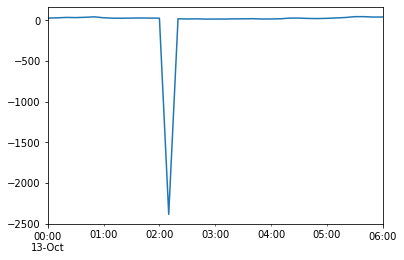

In [ ]:
wd['Total Cloud Cover [%]'].plot()

In [ ]:
model=ARIMA(endog=wd['Total Cloud Cover [%]'],exog=wd,order=(1,1,1))
history = model.fit(disp=0)

ValueError: ignored

In [ ]:
print(history.summary())

In [ ]:
for i,row in enumerate(test_data.index):
  folder = test_data.loc[row,'']